# Variants of Hypothesis testing

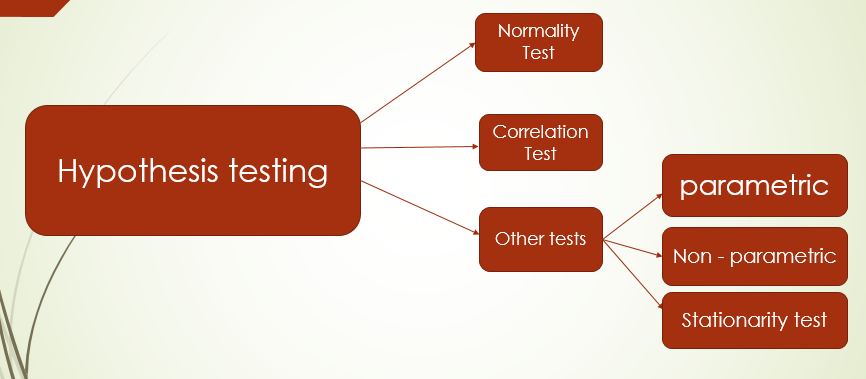

In [3]:
from IPython.display import Image
Image(filename='C:\\Users\\User\\Desktop\\Types.png') 

# Process of Hypothesis testing

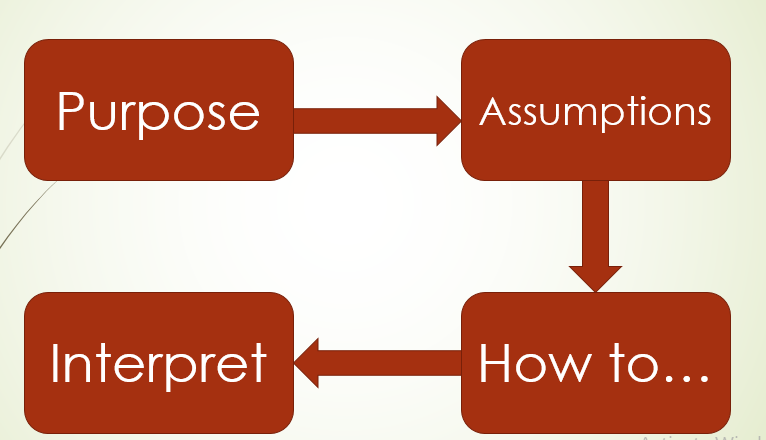

In [4]:
Image(filename='C:\\Users\\User\\Desktop\\flow.png')

# lets do some practical implemetation:

# Normality test using Shapiro-Wilk Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [1]:
#Data Import
import pandas as pd
WineData = pd.read_csv("winequality-red.csv")

In [2]:
WineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


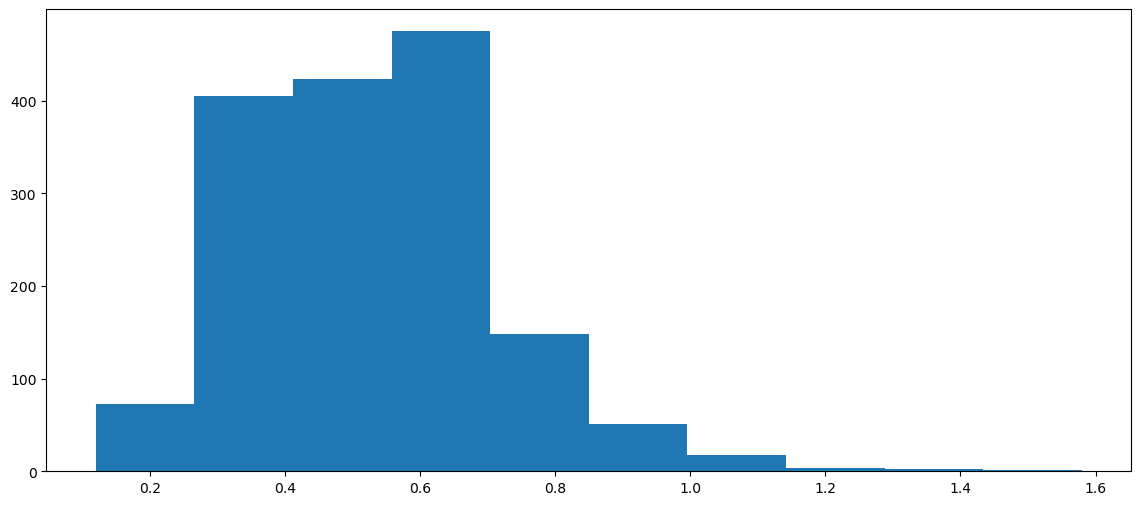

In [3]:
#Cheking Histogram
import matplotlib
from matplotlib import pyplot 
%matplotlib inline
pyplot.figure(figsize=(14,6))
pyplot.hist(WineData['volatile acidity'])
pyplot.show()

In [4]:
#Help from Python
from scipy.stats import shapiro

DataToTest = WineData['volatile acidity']

stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.97, p=0.000000000000000268638537394731
Not a normal distribution


In [9]:
#Lets genrate normally distributed data from Python
from numpy.random import randn
DataToTest = randn(100)

In [10]:
DataToTest

array([ 2.08848237e+00,  9.69310267e-01,  3.77344666e-04,  8.45280891e-01,
        3.70576657e-01, -1.18288175e+00, -9.23446346e-01,  8.32052059e-01,
        7.74468824e-02,  1.46010243e+00,  2.34784028e+00, -2.35871933e-01,
        3.22311502e-01,  1.87160018e-01,  6.84692885e-01, -2.00324360e-01,
        2.46278665e-01, -7.96137543e-01,  4.50226015e-02,  1.47611330e+00,
       -1.18380501e+00, -6.77888428e-01,  1.27783694e+00,  9.02041238e-01,
        6.37655115e-01,  1.33702269e+00,  9.32454980e-02, -4.86515418e-01,
        1.58790558e-01, -8.21836433e-01, -4.62187978e-01, -1.84464128e+00,
       -5.46728685e-01, -1.43679059e-01, -1.41332405e-01, -1.70189701e+00,
       -8.95364702e-02, -1.04320317e+00, -9.74950118e-01,  1.39647019e+00,
       -1.47530476e+00,  5.89518471e-01, -5.78314628e-02,  6.68739805e-01,
       -5.13810901e-01,  1.74621220e+00, -1.68599077e+00, -3.94678533e-01,
        1.10304027e+00, -1.96460203e+00, -4.15965533e-01,  1.72108014e+00,
        1.34993172e+00,  

In [11]:
stat, p = shapiro(DataToTest)

print('stat=%.2f, p=%.30f' % (stat, p))

if p > 0.05:
    print('Normal distribution')
else:
    print('Not a normal distribution')

stat=0.99, p=0.640997469425201416015625000000
Normal distribution


# Normality test using K^2 Normality Test Test : tests If data is normally distributed 
Assumption : Observations are identically distributed

In [5]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
DataToTest = WineData['volatile acidity']

stat, p = normaltest(DataToTest)

print('stat=%.10f, p=%.10f' % (stat, p))

if p > 0.05:
    print('Normal')

else:
    print('Not Normllay distributed')

stat=143.4193435598, p=0.0000000000
Not Normllay distributed


# Correlation Test - Pearson and Spearman’s Rank Correlation
Asumption - Identical and Normal Distribution

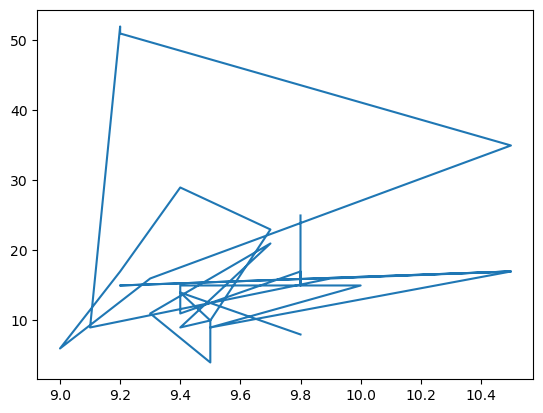

In [10]:
FirstSample = WineData[1:30]['alcohol']
SecondSample = WineData[1:30]['free sulfur dioxide']

pyplot.plot(FirstSample,SecondSample)
pyplot.show()

In [11]:
#Spearman Rank Correlation
from scipy.stats import spearmanr
stat, p = spearmanr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.199, p=0.300205
independent samples


In [8]:
#pearson correlation
from scipy.stats import pearsonr
stat, p = pearsonr(FirstSample, SecondSample)

print('stat=%.3f, p=%5f' % (stat, p))
if p > 0.05:
    print('independent samples')
else:
    print('dependent samples')

stat=0.855, p=0.000000
dependent samples


In [16]:
WineData[1:30].corr(method="pearson")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.325296,0.553331,0.064789,0.145997,0.369643,0.351803,0.558823,-0.554355,0.176146,-0.014915,0.232732
volatile acidity,-0.325296,1.000000,-0.808892,0.086848,-0.086997,-0.046489,-0.045020,-0.018832,0.176232,-0.058765,-0.116946,-0.323907
citric acid,0.553331,-0.808892,1.000000,0.163451,0.302150,0.273691,0.356156,0.321183,-0.402765,0.404090,0.247358,0.246825
residual sugar,0.064789,0.086848,0.163451,1.000000,-0.069497,0.278564,0.580704,0.524667,-0.011351,0.074962,0.358012,-0.324054
chlorides,0.145997,-0.086997,0.302150,-0.069497,1.000000,0.226563,0.211043,0.118830,-0.601472,0.644596,-0.342212,-0.037891
free sulfur dioxide,0.369643,-0.046489,0.273691,0.278564,0.226563,1.000000,0.854553,0.430067,-0.204240,0.156305,0.056671,0.120759
total sulfur dioxide,0.351803,-0.045020,0.356156,0.580704,0.211043,0.854553,1.000000,0.523186,-0.280118,0.210051,0.229037,-0.112902
density,0.558823,-0.018832,0.321183,0.524667,0.118830,0.430067,0.523186,1.000000,-0.181546,0.300643,-0.089917,-0.249689
pH,-0.554355,0.176232,-0.402765,-0.011351,-0.601472,-0.204240,-0.280118,-0.181546,1.000000,-0.539957,0.232744,0.007259
sulphates,0.176146,-0.058765,0.404090,0.074962,0.644596,0.156305,0.210051,0.300643,-0.539957,1.000000,-0.172364,-0.120335


# Correlation of categorical variable - Chi square test

In [17]:
#Tests whether two categorical variables are related or independent.
#Assumptions - independent observation, size in each box of contingency table > 25
# Example of the Chi-Squared Test


In [18]:
LoanData = pd.read_csv("C:\\Users\\User\\Downloads\\loan_status.csv")

In [19]:
LoanData.head(10)

,grade,sub_grade,loan_status,purpose
0,B,B2,Fully Paid,credit_Card
1,C,C4,Charged Off,credit_Card
2,C,C5,Fully Paid,credit_Card
3,C,C1,Fully Paid,credit_Card
4,B,B5,Fully Paid,credit_Card
5,A,A4,Fully Paid,credit_Card
6,C,C5,Fully Paid,debt_consolidation
7,E,E1,Fully Paid,credit_Card
8,F,F2,Charged Off,credit_Card
9,B,B5,Charged Off,credit_Card


In [20]:
contingency_data = pd.crosstab(LoanData['purpose'], LoanData['loan_status'],margins = False)

In [21]:
contingency_data

loan_status,Charged Off,Fully Paid
purpose,,
credit_Card,14,42
debt_consolidation,8,36


In [12]:
from scipy.stats import chi2_contingency

In [23]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=0.329, p=0.566
independent categories


In [24]:
contingency_data = [[25,125],[1200,240]] #Observe the numbers carefully

In [25]:
stat, p, dof, expected = chi2_contingency(contingency_data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('independent categories')
else:
    print('dependent categories')

stat=337.622, p=0.000
dependent categories


In [26]:
##To be Continued with many more examples

# Parametic test 1- T-test

# Definiton of Parametric test - Main assumption - data is normally distributed

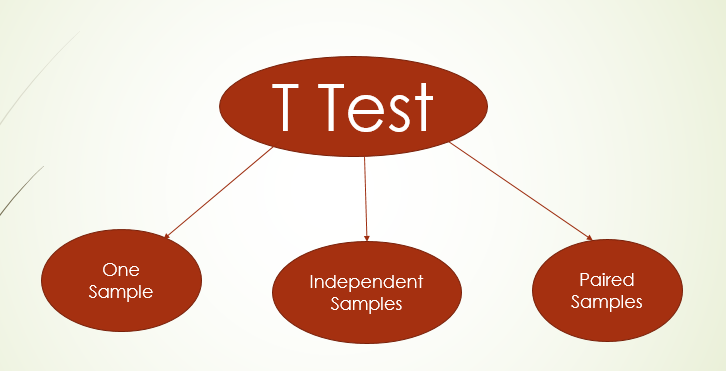

In [27]:
Image(filename='C:\\Users\\User\\Desktop\\T-test.png') 

In [97]:
#Scores of me and Virat
my_score = [23,21,31,20,19,35,26,22,21,19]
virat_score = [46,42,62,40,38,70,52,44,42,38]

In [98]:
#Lets check mean of our scores
import numpy as np
print('Aman mean score:', np.mean(my_score))
print('Virat mean score:', np.mean(virat_score))

Aman mean score: 23.7
Virat mean score: 47.4


In [101]:
#One Sample T-test
import scipy
scipy.stats.ttest_1samp(my_score,20)

Ttest_1sampResult(statistic=2.1681507160852993, pvalue=0.058288767709368715)

In [102]:
#Independent Sample T-test
scipy.stats.ttest_ind(my_score,virat_score)

Ttest_indResult(statistic=-6.210850679090182, pvalue=7.3390410384768156e-06)

In [51]:
my_score_second_Tour = [46,42,62,40,38,70,52,44,42,38]

In [25]:
import math 
import numpy as np
from statsmodels.stats.weightstats import ztest
population_mean=641
sample_marks = [650,730,510,670,480,800,690,530,590,620,710,670,640,780,650,490,800,600,510,700]
ztest_score, pval = ztest(sample_marks,value=population_mean,alternative='larger')


#
print('Z-test Score:',ztest_score,'\nP-value:',pval)
if(pval>0.05):
     print('Null hypothesis is accepted!')
else:
    print('Null hypothesis is rejected. \nAlternate hypothesis is accepted!')   
 

Z-test Score: 0.0 
P-value: 0.5
Null hypothesis is accepted!


In [103]:
#Apired sample t-test
scipy.stats.ttest_rel(my_score,my_score_second_Tour)
# same : null hypothesis

Ttest_relResult(statistic=-13.88788431654638, pvalue=2.1983272300073563e-07)

In [18]:
np.mean(sample_marks)

641.0

# Parametic test 2 - Anova - Tests whether the means of two or more independent samples are significantly different.

In [56]:
# Assumption -  Normal distributon, same variance, identical distribution

In [61]:
average_score = [40,44,60,50,48,68,55,46,44,54]

In [104]:
my_score

[23, 21, 31, 20, 19, 35, 26, 22, 21, 19]

In [105]:
average_score

[40, 44, 60, 50, 48, 68, 55, 46, 44, 54]

In [106]:
virat_score

[46, 42, 62, 40, 38, 70, 52, 44, 42, 38]

In [107]:
tstat, p = scipy.stats.f_oneway(my_score, average_score, virat_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution of scores')
else:
    print('Different distributions of scores')

stat=-0.949, p=0.000
Different distributions of scores


# Non Parametric test 1 - Mann-Whitney U Test-Tests whether the distributions of two or more independent samples are equal or not.

In [82]:
#Assumptions - Idential distribution, observations can be ranked

In [108]:
class_1_score = [91,90,81,80,76]
class_2_score = [88,86,85,84,83]

In [109]:
tstat, p = scipy.stats.mannwhitneyu(class_1_score, class_2_score)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Same distribution')
else:
    print('Different distributions')

stat=-0.949, p=0.338
Same distribution


In [ ]:
# Similarly check for Wilcoxon Signed-Rank Test/Kruskal-Wallis H Test

# Test of Stationarity - very Important for time series analysis

In [85]:
#Augmented Dickey-Fuller Test -  null hypothesis - Series is non stationary

In [86]:
#Definition of stationary time series - constant mean and variance

In [112]:
from statsmodels.tsa.stattools import adfuller
stock_price_data = [121,131,142,121,131,142,121,131,142]
stat, p, lags, obs, crit, t = adfuller(stock_price_data)


In [113]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Series is not Stationary')
else:
    print('Series is stationary')

stat=-2521908596210.724, p=0.000
Series is stationary


In [ ]:
#Also check for Kwiatkowski-Phillips-Schmidt-Shin